In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
csv_umsatz = "https://raw.githubusercontent.com/AHennke/OC-Course/main/umsatzdaten_gekuerzt.csv"
csv_wetter = "https://raw.githubusercontent.com/AHennke/OC-Course/main/wetter.csv"
csv_kiwo = "https://raw.githubusercontent.com/AHennke/OC-Course/main/kiwo.csv"

In [ ]:
df_umsatz = pd.read_csv(csv_umsatz)
df_wetter = pd.read_csv(csv_wetter)
df_kiwo = pd.read_csv(csv_kiwo)

In [ ]:
df_umsatz.head()

,Datum,Warengruppe,Umsatz
0,2013-07-01,1,148.828353
1,2013-07-02,1,159.793757
2,2013-07-03,1,111.885594
3,2013-07-04,1,168.864941
4,2013-07-05,1,171.280754


In [ ]:
df_wetter.head()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


In [ ]:
df_kiwo.head()

,Datum,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1


#### identify the different values within one column

In [ ]:
unique_values = df_umsatz['Warengruppe'].unique()
print(unique_values)

[1 2 3 4 5 6]


In [ ]:
total_rows = df_umsatz.shape[0]
print(total_rows)

9334


##### merge Umsatz and Wetter Data frame via left join (left is Umsatz)

In [ ]:
merged_df = pd.merge(df_umsatz, df_wetter, on='Datum', how='left')

In [98]:
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN


##### merge the kiwo data via left join as well

In [99]:
merged_df = pd.merge(merged_df, df_kiwo, on='Datum', how='left')

In [100]:
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN


In [101]:
print(merged_df)

           Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0     2013-07-01            1  148.828353         6.0     17.8375   
1     2013-07-02            1  159.793757         3.0     17.3125   
2     2013-07-03            1  111.885594         7.0     21.0750   
3     2013-07-04            1  168.864941         7.0     18.8500   
4     2013-07-05            1  171.280754         5.0     19.9750   
...          ...          ...         ...         ...         ...   
9329  2017-12-21            6   87.471228         7.0      6.2375   
9330  2017-12-22            6   71.911652         7.0      5.7625   
9331  2017-12-23            6   84.062223         7.0      7.8000   
9332  2017-12-24            6   60.981969         7.0      8.1125   
9333  2017-12-27            6   34.972644         7.0      4.6125   

      Windgeschwindigkeit  Wettercode  KielerWoche  
0                    15.0        20.0          NaN  
1                    10.0         NaN          NaN  
2           

In [103]:
# convert NaN values to 0 to proceed with the calculation

merged_df.fillna(0, inplace=True)
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,0.0
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,0.0,0.0
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,0.0
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,0.0
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,0.0,0.0


In [ ]:
# Convert Date to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Datum'])

In [ ]:
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Date
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN,2013-07-01
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN,2013-07-02
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN,2013-07-03
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN,2013-07-04
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN,2013-07-05


In [106]:
# This code will remove the columns specified in the columns_to_remove list from your DataFrame df. Setting inplace=True modifies the DataFrame in place, meaning the changes will be applied directly to df.
column_to_remove = ["Datum"]
merged_df.drop(columns=column_to_remove, inplace=True)

<Axes: xlabel='Temperatur', ylabel='Windgeschwindigkeit'>

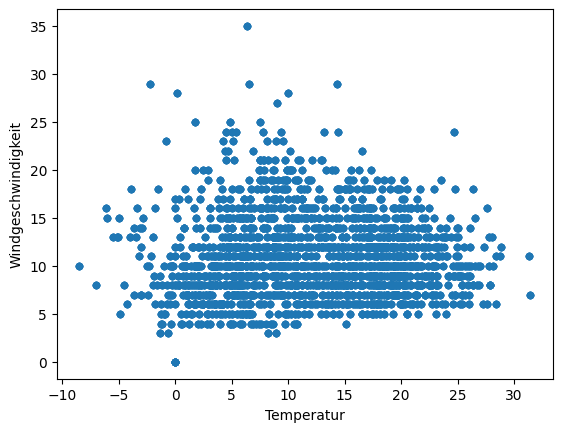

In [109]:
# evaluate correlation between T and wind

merged_df.plot(x='Temperatur', y='Windgeschwindigkeit', kind='scatter')

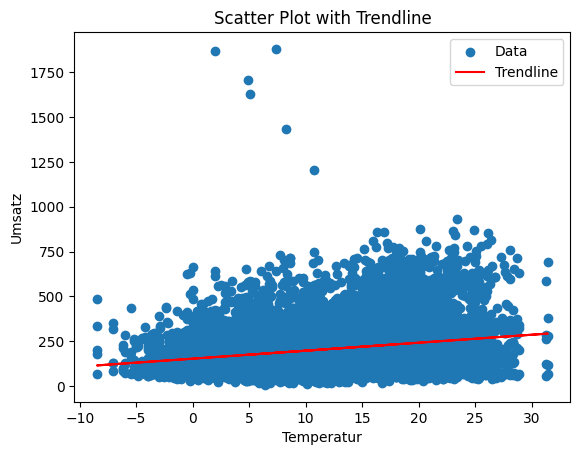

In [117]:
x = merged_df['Temperatur']
y = merged_df['Umsatz']

# Scatter plot
plt.scatter(x, y, label='Data')

# Calculate the polynomial regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', label='Trendline')

# Add labels, title, and legend
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Scatter Plot with Trendline')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Assign weekdays to the dates
merged_df['Weekday'] = merged_df['Date'].dt.weekday  # Monday is 0 and Sunday is 6

In [ ]:
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Date,Weekday
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN,2013-07-01,0
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN,2013-07-02,1
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN,2013-07-03,2
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN,2013-07-04,3
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN,2013-07-05,4


In [ ]:
# Map weekday numbers to weekday names (optional)
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
merged_df['Weekday'] = merged_df['Weekday'].map(weekday_names)

In [ ]:
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Date,Weekday
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN,2013-07-01,Monday
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN,2013-07-02,Tuesday
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN,2013-07-03,Wednesday
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN,2013-07-04,Thursday
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN,2013-07-05,Friday


In [ ]:
# Calculate the mean of each weekday
weekday_means = merged_df.groupby('Weekday')['Umsatz'].mean()

# Sort weekdays by their number
weekday_means = weekday_means.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_means

Weekday
Monday       193.688449
Tuesday      187.944440
Wednesday    187.477523
Thursday     193.232274
Friday       196.796023
Saturday     241.319882
Sunday       246.495651
Name: Umsatz, dtype: float64

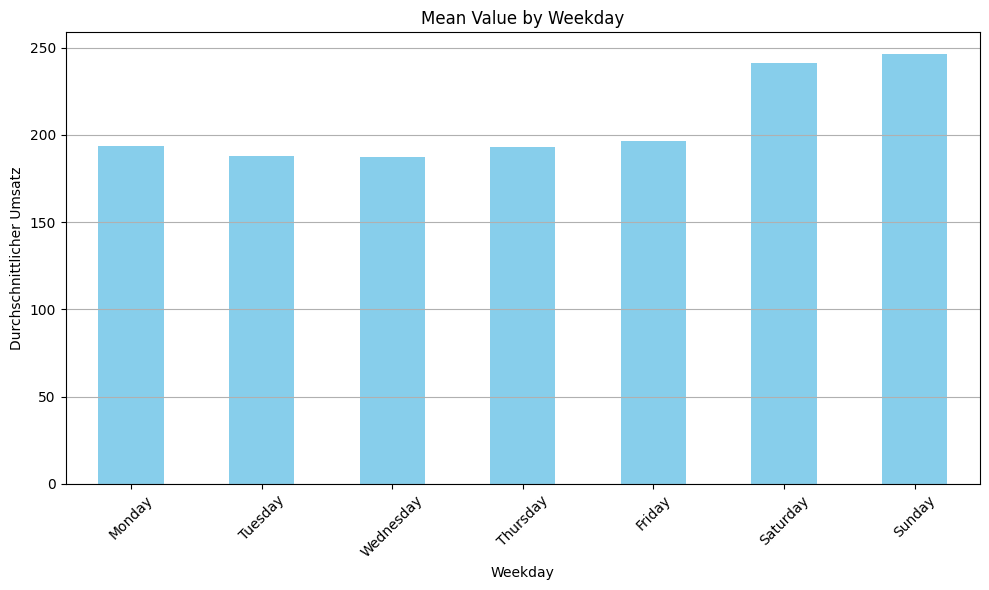

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
weekday_means.plot(kind='bar', color='skyblue')
plt.title('Mean Value by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Calculate the mean sales for each month

In [ ]:
#Create a new column for month: Extract the month from the 'date' column and create a new column in the DataFrame to store it.

merged_df['month'] = merged_df['Date'].dt.month

In [ ]:
merged_df.head()

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Date,Weekday,month
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN,2013-07-01,Monday,7
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN,2013-07-02,Tuesday,7
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN,2013-07-03,Wednesday,7
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN,2013-07-04,Thursday,7
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN,2013-07-05,Friday,7


In [ ]:
#Create a new column for month: Extract the month from the 'date' column and create a new column in the DataFrame to store it.

merged_df['month'] = merged_df['Date'].dt.month

In [77]:
#Group by month and calculate the mean: Use the groupby() function to group the DataFrame by the 'month' column, then calculate the mean for each group.

monthly_means = merged_df.groupby('month')['Umsatz'].mean()
monthly_means.head()

month
1    167.972552
2    185.515356
3    182.284023
4    197.351662
5    211.430539
Name: Umsatz, dtype: float64

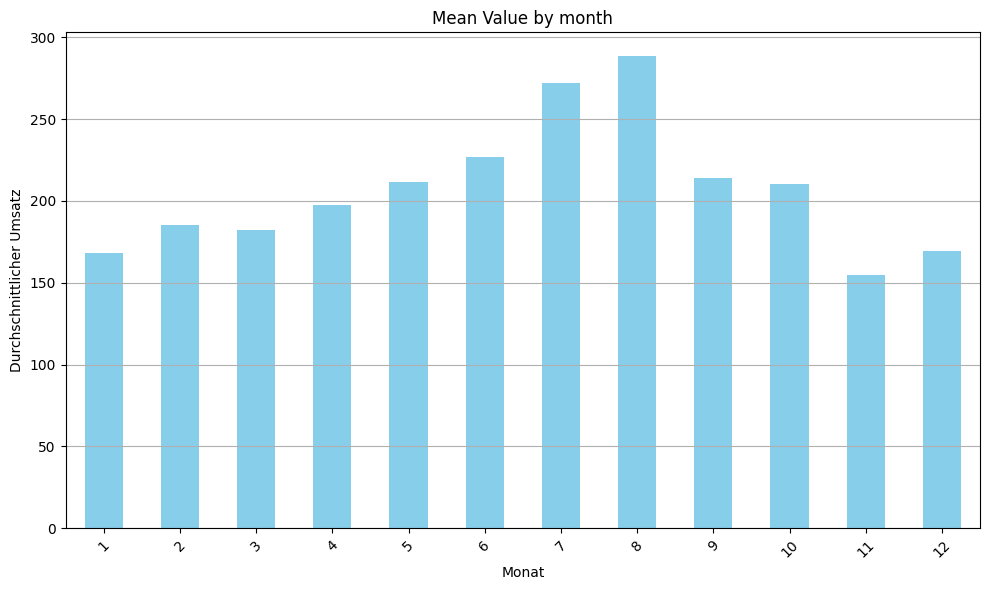

In [61]:
# Plotting the results
plt.figure(figsize=(10, 6))
monthly_means.plot(kind='bar', color='skyblue')
plt.title('Mean Value by month')
plt.xlabel('Monat')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [71]:
non_numeric_columns = merged_df.select_dtypes(exclude=['number']).columns
# Convert non-numeric columns to numeric (if possible)
for column in non_numeric_columns:
    try:
        merged_df[column] = pd.to_numeric(merged_df[column])
    except ValueError:
        print(f"Could not convert {column} to numeric.")

Could not convert Datum to numeric.
Could not convert Weekday to numeric.


In [74]:
# This code will remove the columns specified in the columns_to_remove list from your DataFrame df. Setting inplace=True modifies the DataFrame in place, meaning the changes will be applied directly to df.
columns_to_remove = ["Weekday", "Datum"]
merged_df.drop(columns=columns_to_remove, inplace=True)

In [76]:
# group by month and calculate the mean and write it to a new dataframe
monthly_means_df = merged_df.groupby('month').mean().reset_index()
monthly_means_df.head()

,month,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Date
0,1,3.023810,167.972552,6.033069,2.681689,10.699735,38.429894,0.0,1.452679e+18
1,2,3.000000,185.515356,5.333333,3.848151,10.801418,32.539007,0.0,1.455494e+18
2,3,2.998682,182.284023,4.789196,6.974391,11.865613,24.558630,0.0,1.457619e+18
3,4,2.994528,197.351662,4.285910,10.884644,12.480164,25.430917,0.0,1.461384e+18
4,5,2.994565,211.430539,3.566576,16.074372,11.830163,19.593750,0.0,1.463965e+18


In [62]:
##Group by month and calculate the mean: Use the groupby() function to group the DataFrame by the 'month' column, then calculate the mean for each group.

monthly_means_clouds = merged_df.groupby('month')['Bewoelkung'].mean()
monthly_means_clouds.head()

month
1    6.033069
2    5.333333
3    4.789196
4    4.285910
5    3.566576
Name: Bewoelkung, dtype: float64

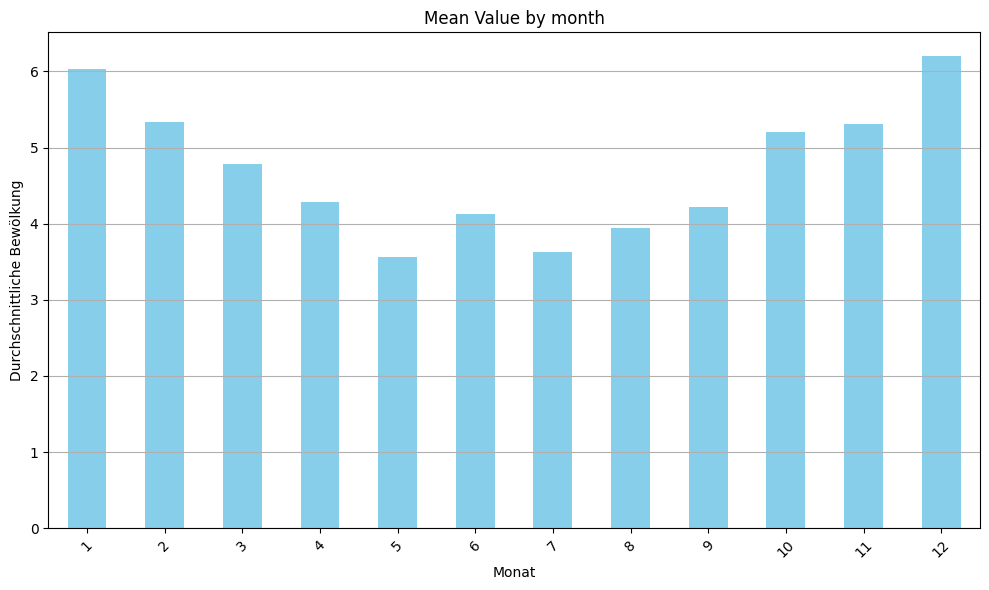

In [63]:
# Plotting the results
plt.figure(figsize=(10, 6))
monthly_means_clouds.plot(kind='bar', color='skyblue')
plt.title('Mean Value by month')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Bewölkung')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [64]:
monthly_means_T = merged_df.groupby('month')['Temperatur'].mean()
monthly_means_T.head()

month
1     2.681689
2     3.848151
3     6.974391
4    10.884644
5    16.074372
Name: Temperatur, dtype: float64

In [78]:
# group by Bewoelkung and calculate the mean and write it to a new dataframe
cloudy_means_df = merged_df.groupby('Bewoelkung').mean().reset_index()
cloudy_means_df.head()

,Bewoelkung,Warengruppe,Umsatz,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Date,month
0,0.0,3.053125,220.800400,16.477757,10.191406,1.769531,0.011719,1.458272e+18,6.421094
1,1.0,3.025594,220.113238,13.717779,10.601463,4.195612,0.009141,1.452459e+18,5.950640
2,2.0,3.082218,214.249575,14.498040,10.311663,8.296367,0.019120,1.447034e+18,7.082218
3,3.0,3.081772,229.194492,15.002037,10.819421,12.853492,0.034072,1.449170e+18,7.308348
4,4.0,3.052317,219.106433,13.830699,11.248132,22.765321,0.029895,1.452055e+18,7.025411


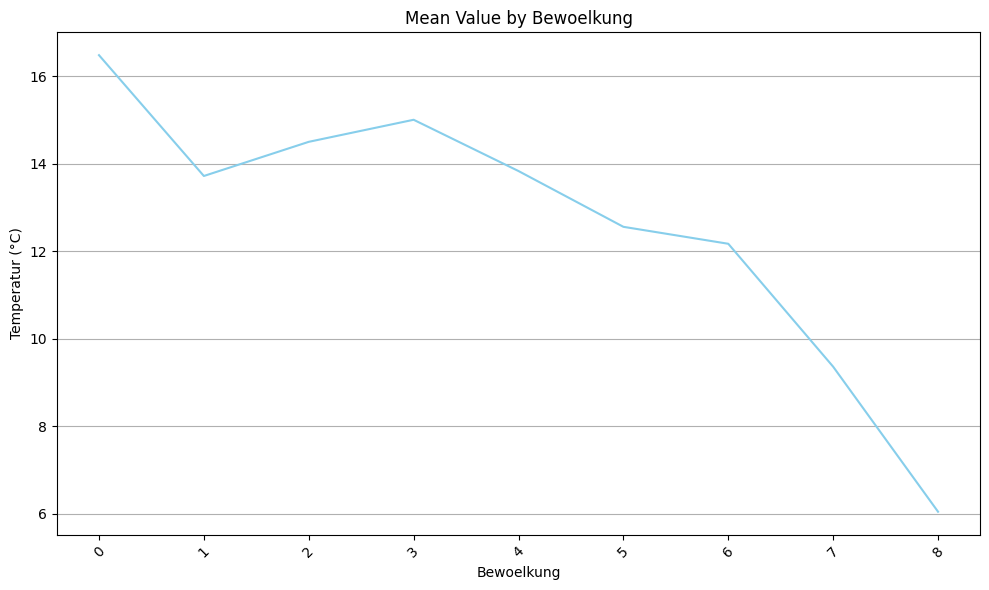

In [85]:
# Plotting the Temperature by Bewoelkung

plt.figure(figsize=(10, 6))
cloudy_means_df[ 'Temperatur'].plot(kind='line', color='skyblue')
plt.title('Mean Value by Bewoelkung')
plt.xlabel('Bewoelkung')
plt.ylabel('Temperatur (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

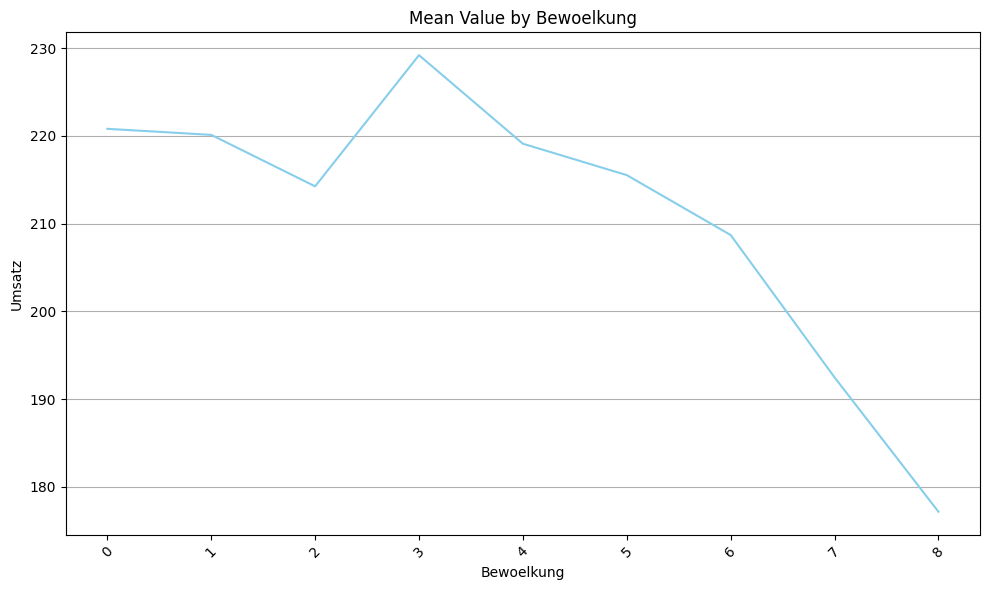

In [86]:
# Plotting the Umsatz by Bewoelkung

plt.figure(figsize=(10, 6))
cloudy_means_df[ 'Umsatz'].plot(kind='line', color='skyblue')
plt.title('Mean Value by Bewoelkung')
plt.xlabel('Bewoelkung')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [87]:
# group by Windgeschwindigkeit and calculate the mean and write it to a new dataframe
wind_means_df = merged_df.groupby('Windgeschwindigkeit').mean().reset_index()
wind_means_df.head()

,Windgeschwindigkeit,Warengruppe,Umsatz,Bewoelkung,Temperatur,Wettercode,KielerWoche,Date,month
0,0.0,3.187500,187.013198,0.000000,0.000000,0.000000,0.000000,1.497479e+18,10.750000
1,3.0,3.272727,172.747425,6.772727,4.222159,39.454545,0.000000,1.440394e+18,6.727273
2,4.0,3.188312,165.130706,5.155844,5.417266,24.025974,0.000000,1.457282e+18,7.090909
3,5.0,3.156863,181.765535,5.473856,9.355357,25.924837,0.016340,1.459654e+18,7.052288
4,6.0,3.082353,200.262018,5.021849,11.548256,23.556303,0.016807,1.453985e+18,7.231933
